In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/parkerharalds/Downloads/IMDB TMDB Movie Metadata Big Dataset (1M).csv')

In [4]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,release_year,AverageRating,IMDB_Rating,Meta_score,overview_sentiment
count,1.072255e+06,1.072255e+06,1.072255e+06,1.072255e+06,1.072255e+06,1.072255e+06,1.072255e+06,921699.000000,11751.000000,30312.000000,2331.000000,1.072255e+06
mean,7.035069e+05,1.979590e+00,2.000193e+01,7.181273e+05,4.918518e+01,2.797329e+05,1.282323e+00,1999.465214,6.703583,6.560257,78.918061,5.804077e-02
std,3.764901e+05,3.063890e+00,3.278991e+02,1.808345e+07,6.204454e+01,5.067542e+06,7.808179e+00,26.594861,0.805886,0.968390,12.189198,1.912045e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00,1800.000000,1.000000,1.900000,28.000000,-1.000000e+00
25%,3.915860e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01,1989.000000,6.200000,6.000000,72.000000,0.000000e+00
50%,7.060940e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,0.000000e+00,6.000000e-01,2010.000000,6.700000,6.600000,80.000000,0.000000e+00
75%,1.034148e+06,5.000000e+00,1.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00,8.850000e-01,2018.000000,7.200000,7.300000,88.000000,1.416667e-01
max,1.325153e+06,1.000000e+01,3.449500e+04,3.000000e+09,1.440000e+04,9.000000e+08,2.994357e+03,2099.000000,9.300000,9.300000,100.000000,1.000000e+00


In [5]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords', 'release_year',
       'Director', 'AverageRating', 'Poster_Link', 'Certificate',
       'IMDB_Rating', 'Meta_score', 'Star1', 'Star2', 'Star3', 'Star4',
       'Writer', 'Director_of_Photography', 'Producers', 'Music_Composer',
       'genres_list', 'Cast_list', 'overview_sentiment',
       'all_combined_keywords'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072255 entries, 0 to 1072254
Data columns (total 42 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1072255 non-null  int64  
 1   title                    1072255 non-null  object 
 2   vote_average             1072255 non-null  float64
 3   vote_count               1072255 non-null  int64  
 4   status                   1072255 non-null  object 
 5   release_date             921699 non-null   object 
 6   revenue                  1072255 non-null  int64  
 7   runtime                  1072255 non-null  int64  
 8   adult                    1072255 non-null  bool   
 9   backdrop_path            292826 non-null   object 
 10  budget                   1072255 non-null  int64  
 11  homepage                 115519 non-null   object 
 12  imdb_id                  589364 non-null   object 
 13  original_language        1072255 non-null 

In [7]:
df.isnull().sum()

id                               0
title                            0
vote_average                     0
vote_count                       0
status                           0
release_date                150556
revenue                          0
runtime                          0
adult                            0
backdrop_path               779429
budget                           0
homepage                    956736
imdb_id                     482891
original_language                0
original_title                   0
overview                    202181
popularity                       0
poster_path                 317838
tagline                     919472
production_companies        575683
production_countries        456376
spoken_languages            440257
keywords                         0
release_year                150556
Director                         0
AverageRating              1060504
Poster_Link                1069485
Certificate                1042420
IMDB_Rating         

There are many columns that contain a huge percentage of null values. Fortunately, these columns contain mostly text data that will not be used for this project. Moving on to dropping the columns:

In [8]:
drop_these = ['backdrop_path','homepage','overview','poster_path','imdb_id','tagline','AverageRating',
              'Poster_Link','Certificate','IMDB_Rating','Meta_score','Star1','Star2','Star3',
              'Star4']

In [9]:
df1 = df.drop(drop_these,axis=1)

vote_count seems to be good indicator of popular movies. Further reviewing this row:

In [10]:
df1.sort_values(by='vote_count',ascending=False)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,release_year,Director,Writer,Director_of_Photography,Producers,Music_Composer,genres_list,Cast_list,overview_sentiment,all_combined_keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,2010.0,Christopher Nolan,Christopher Nolan,Wally Pfister,"Thomas Tull, Christopher Nolan, Chris Brigham,...",Hans Zimmer,"['Action', 'Science Fiction', 'Adventure']","['Tim Kelleher', 'Silvie Laguna', 'Natasha Bea...",-0.011111,"['s', 'philosophy', 'skilled', 'kidnapping', '..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,2014.0,Christopher Nolan,Jonathan Nolan,Hoyte van Hoytema,"Jake Myers, Emma Thomas, Jordan Goldberg, Thom...",Hans Zimmer,"['Adventure', 'Drama', 'Science Fiction']","['Jeff Hephner', 'William Devane', 'Elyes Gabe...",0.045455,"['thoughtful', 'use', 'scientist', 'quantum me..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,2008.0,Christopher Nolan,Jonathan Nolan,Wally Pfister,"Kevin De La Noy, Thomas Tull, Christopher Nola...","Hans Zimmer, James Newton Howard","['Drama', 'Action', 'Crime', 'Thriller']","['Tommy Lister Jr.', 'Edison Chen', 'Beatrice ...",0.025000,"['reign', 'harvey', 'proves', 'partnership', '..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,2009.0,James Cameron,James Cameron,Mauro Fiore,"Jon Landau, Colin Wilson, Laeta Kalogridis, Ja...",James Horner,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Carvon Futrell', 'Joel David Moore', 'Jon Cu...",0.041667,"['space war', 'civilization', 'society', 'mari..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,2012.0,Joss Whedon,Sydney Newman,NaN,NaN,NaN,"['Science Fiction', 'Action', 'Adventure']","['Haneyuri', 'Nako Mizusawa', 'Marin', 'Rikako...",0.025000,"['s', 'world', 'begins', 'e', 'global safety',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589921,1288305,Just a Bareback Trick,0.000,0,Released,2015-01-01,0,112,True,0,...,2015.0,Philipp Artus,NaN,NaN,NaN,NaN,['Unknown'],['Unknown'],-0.046958,"['loadmaster', 's', 'started', 'blows', 'butt'..."
589922,1288306,Longe de Cabul,0.000,0,Released,NaN,0,0,False,0,...,NaN,Unknown,NaN,NaN,NaN,NaN,['Unknown'],['Unknown'],0.000000,[]
589923,1288307,Godzilla (Newest),0.000,0,Released,NaN,0,0,False,0,...,NaN,Unknown,NaN,NaN,NaN,NaN,['Unknown'],"['Steven Spielberg', 'Morgan Freeman']",-0.100000,"['mayhem', 'way', 'resurfaces', 'need', 'trans..."
589924,1288308,In Dark Dirty Places,0.000,0,Released,2018-05-15,0,111,True,0,...,2018.0,Florian Dietrich,"Birgit Maiwald, Florian Dietrich",NaN,NaN,NaN,['Unknown'],"['Henrike von Kuick', 'Ulrike Lodwig', 'Gerdy ...",-0.197368,"['sebastian', 'sex ...', 'fucked', 'dark', 'de..."


In [11]:
df1[df1['vote_count']==0]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,release_year,Director,Writer,Director_of_Photography,Producers,Music_Composer,genres_list,Cast_list,overview_sentiment,all_combined_keywords
348751,1096818,Tierra de mujeres: De Winifreda a Famatina,0.0,0,Released,NaN,0,0,False,0,...,NaN,Aleksei Polyakov,Marina Sheptunova,NaN,NaN,NaN,['Unknown'],"['Nina Menshikova', 'Yelena Kuzmina', 'Elizave...",0.000000,[]
348752,932116,Pottero,0.0,0,Released,2021-12-01,0,10,False,0,...,2021.0,Laurie Lynd,Raymond Storey,NaN,"Phyllis Platt, Laszlo Barna, Brian Dennis, Tim...",NaN,['Animation'],"['Victoria Snow', 'Kate Lynch', 'Nicole Maille...",0.131667,"['accessible healthcare', 'mental health', 'fa..."
348753,1057653,Škaredá dědina,0.0,0,Released,1975-11-21,0,0,False,0,...,1975.0,Jonathan Hock,NaN,NaN,"Philip Aromando, Larry Robbins, Erin Leyden",NaN,['Drama'],['Henrik Lundqvist'],0.000000,"['1930s', 'based on short story']"
348754,904535,A Big Love,0.0,0,Released,2016-03-16,0,0,False,0,...,2016.0,Sameh Najjar,"Sameh Najjar, Ibrahim Mohsen",NaN,NaN,NaN,['Unknown'],"['Hazem Ehab', 'Reem Abdel Qader', 'Reham Nabi...",0.100000,"['max chicco', 'simona', 'written', 'max', 'or..."
348755,1057655,Face Fuckers,0.0,0,Released,2005-01-01,0,238,True,0,...,2005.0,Sari Gilman,NaN,NaN,"Sari Gilman, Jedd Wider, Todd Wider",NaN,['Unknown'],['Unknown'],0.045312,"['s', 'nacho', 'nacho vidal', 'fuckers', 'hand..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072250,715344,Affability,0.0,0,Released,2017-07-13,0,23,False,0,...,2017.0,Lin Jun-ying,NaN,NaN,Hou Hsiao-hsien,NaN,['Unknown'],"['Chu Tien-wen', 'Chu Tʽien-hsin']",-0.020000,"['lonely', 'couple', 'wife', 'peaceful house',..."
1072251,715345,Such a Beautiful Town,0.0,0,Released,2019-06-12,0,8,False,0,...,2019.0,Peter Bisuito,NaN,NaN,NaN,NaN,"['Animation', 'Drama']","['Robbie', 'Suzanne Sole', 'Peter Bisuito', 'R...",-0.020000,"['lonely', 'embarks', 'unfaithful', 'city', 's..."
1072252,715347,Sura,0.0,0,Released,2020-06-15,0,6,False,0,...,2020.0,Janna Ji Wonders,"Zoran Drvenkar, Sarah Bräuer, Janna Ji Wonders",NaN,NaN,NaN,"['Animation', 'Drama']","['Jude Thomas', 'Robyn Miller', 'Spencer Kenne...",0.497778,"['school', 'pregnant', 'friend', 'best', 'high..."
1072253,715351,Ανεμοστρόβιλος,0.0,0,Released,1964-02-02,0,0,False,0,...,1964.0,Adam Dalupang,"Mauel Opleda, Adam Dalupang",Alec Setiota,Adam Dalupang,NaN,['Drama'],"['Matthew Pineda', 'Adam Dalupang', 'Julie Say...",0.000000,[]


There are ~ 700,000 rows with no votes. Dropping these rows and saving the data frame as rows with at least 1 vote:

In [12]:
movie_df = df1[df1['vote_count']!=0]
# movie_df

Our new 'movie_df' still contains well over 350,000 rows. This df will be used moving forward:

Taking a look at a pairplot for the relationships between numeric values:

In [13]:
#storing numeric columns seperately
numeric_movie_df = movie_df.select_dtypes(include='number')
#numeric_movie_df

In [14]:
numeric_movie_df = numeric_movie_df.drop('id',axis=1)

In [15]:
numeric_movie_df.columns

Index(['vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
       'popularity', 'release_year', 'overview_sentiment'],
      dtype='object')

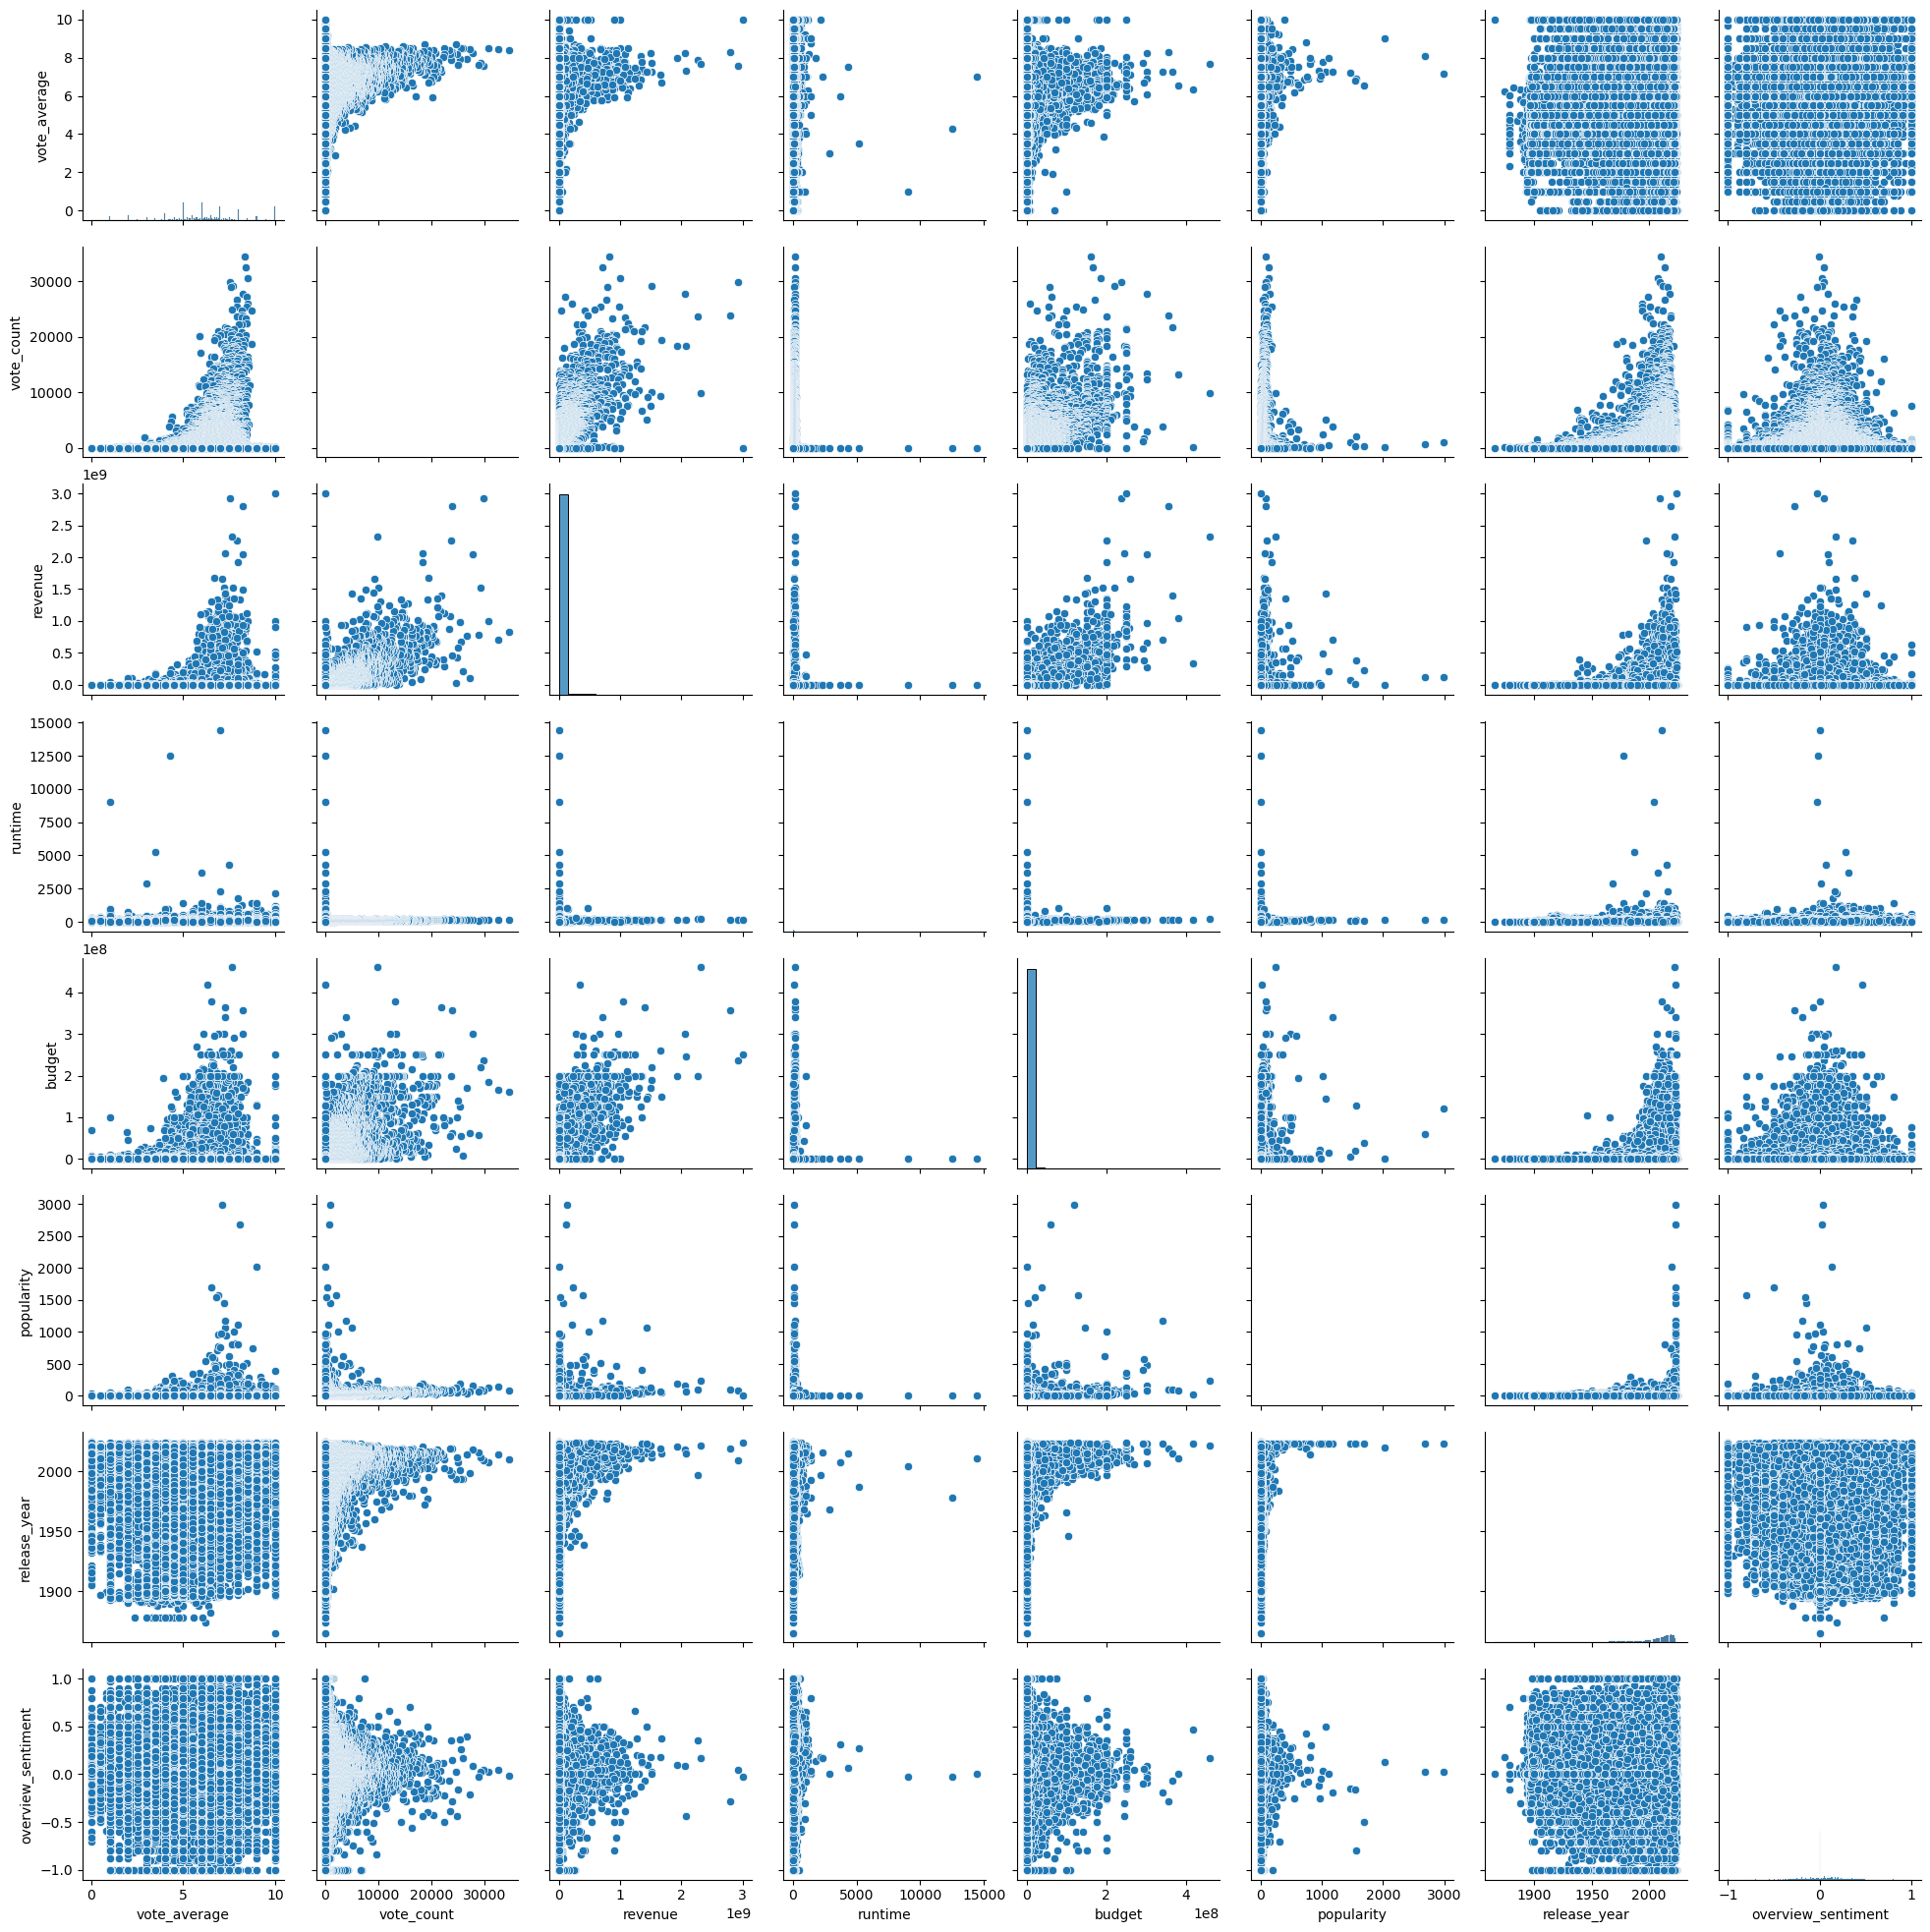

In [16]:
sns.pairplot(numeric_movie_df)

Creating histograms to view distribution of numeric columns:

In [ ]:
# Set up the figure with a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharey=True)

# Flatten the axes array to make it easier to index
axes = axes.flatten()

# Plot each histogram in its own subplot
for i, col in enumerate(numeric_movie_df.columns):
    sns.histplot(numeric_movie_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(df[col].min(), df[col].max())

# Adjust layout for spacing
plt.tight_layout()
plt.show()

<Axes: xlabel='vote_count', ylabel='Count'>

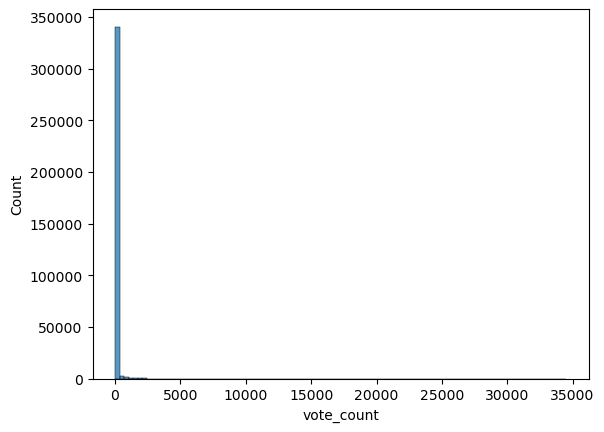

In [22]:
X = numeric_movie_df['vote_count']
sns.histplot(X,bins=100)

In [24]:
movie_df['vote_count'].describe()

count    348751.000000
mean         61.497097
std         572.729070
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max       34495.000000
Name: vote_count, dtype: float64

It looks like we still have a ton of films with very low vote counts

In [30]:
top_10000 = movie_df.sort_values(by='vote_count',ascending=False).head(10000)

In [32]:
top_10000['vote_count'].describe()

count    10000.000000
mean      1768.169000
std       2900.944153
min        256.000000
25%        398.000000
50%        714.000000
75%       1707.250000
max      34495.000000
Name: vote_count, dtype: float64

As shown above, if we sort the movie_df by vote_count, the top 10000 films have a minimum vote count of 256. I will save this data frame as pop_df and use it moving forward:

In [33]:
pop_df = top_10000

In [35]:
num_pop_df = pop_df.select_dtypes(include='number')


In [38]:
num_pop_df = num_pop_df.drop('id', axis=1)

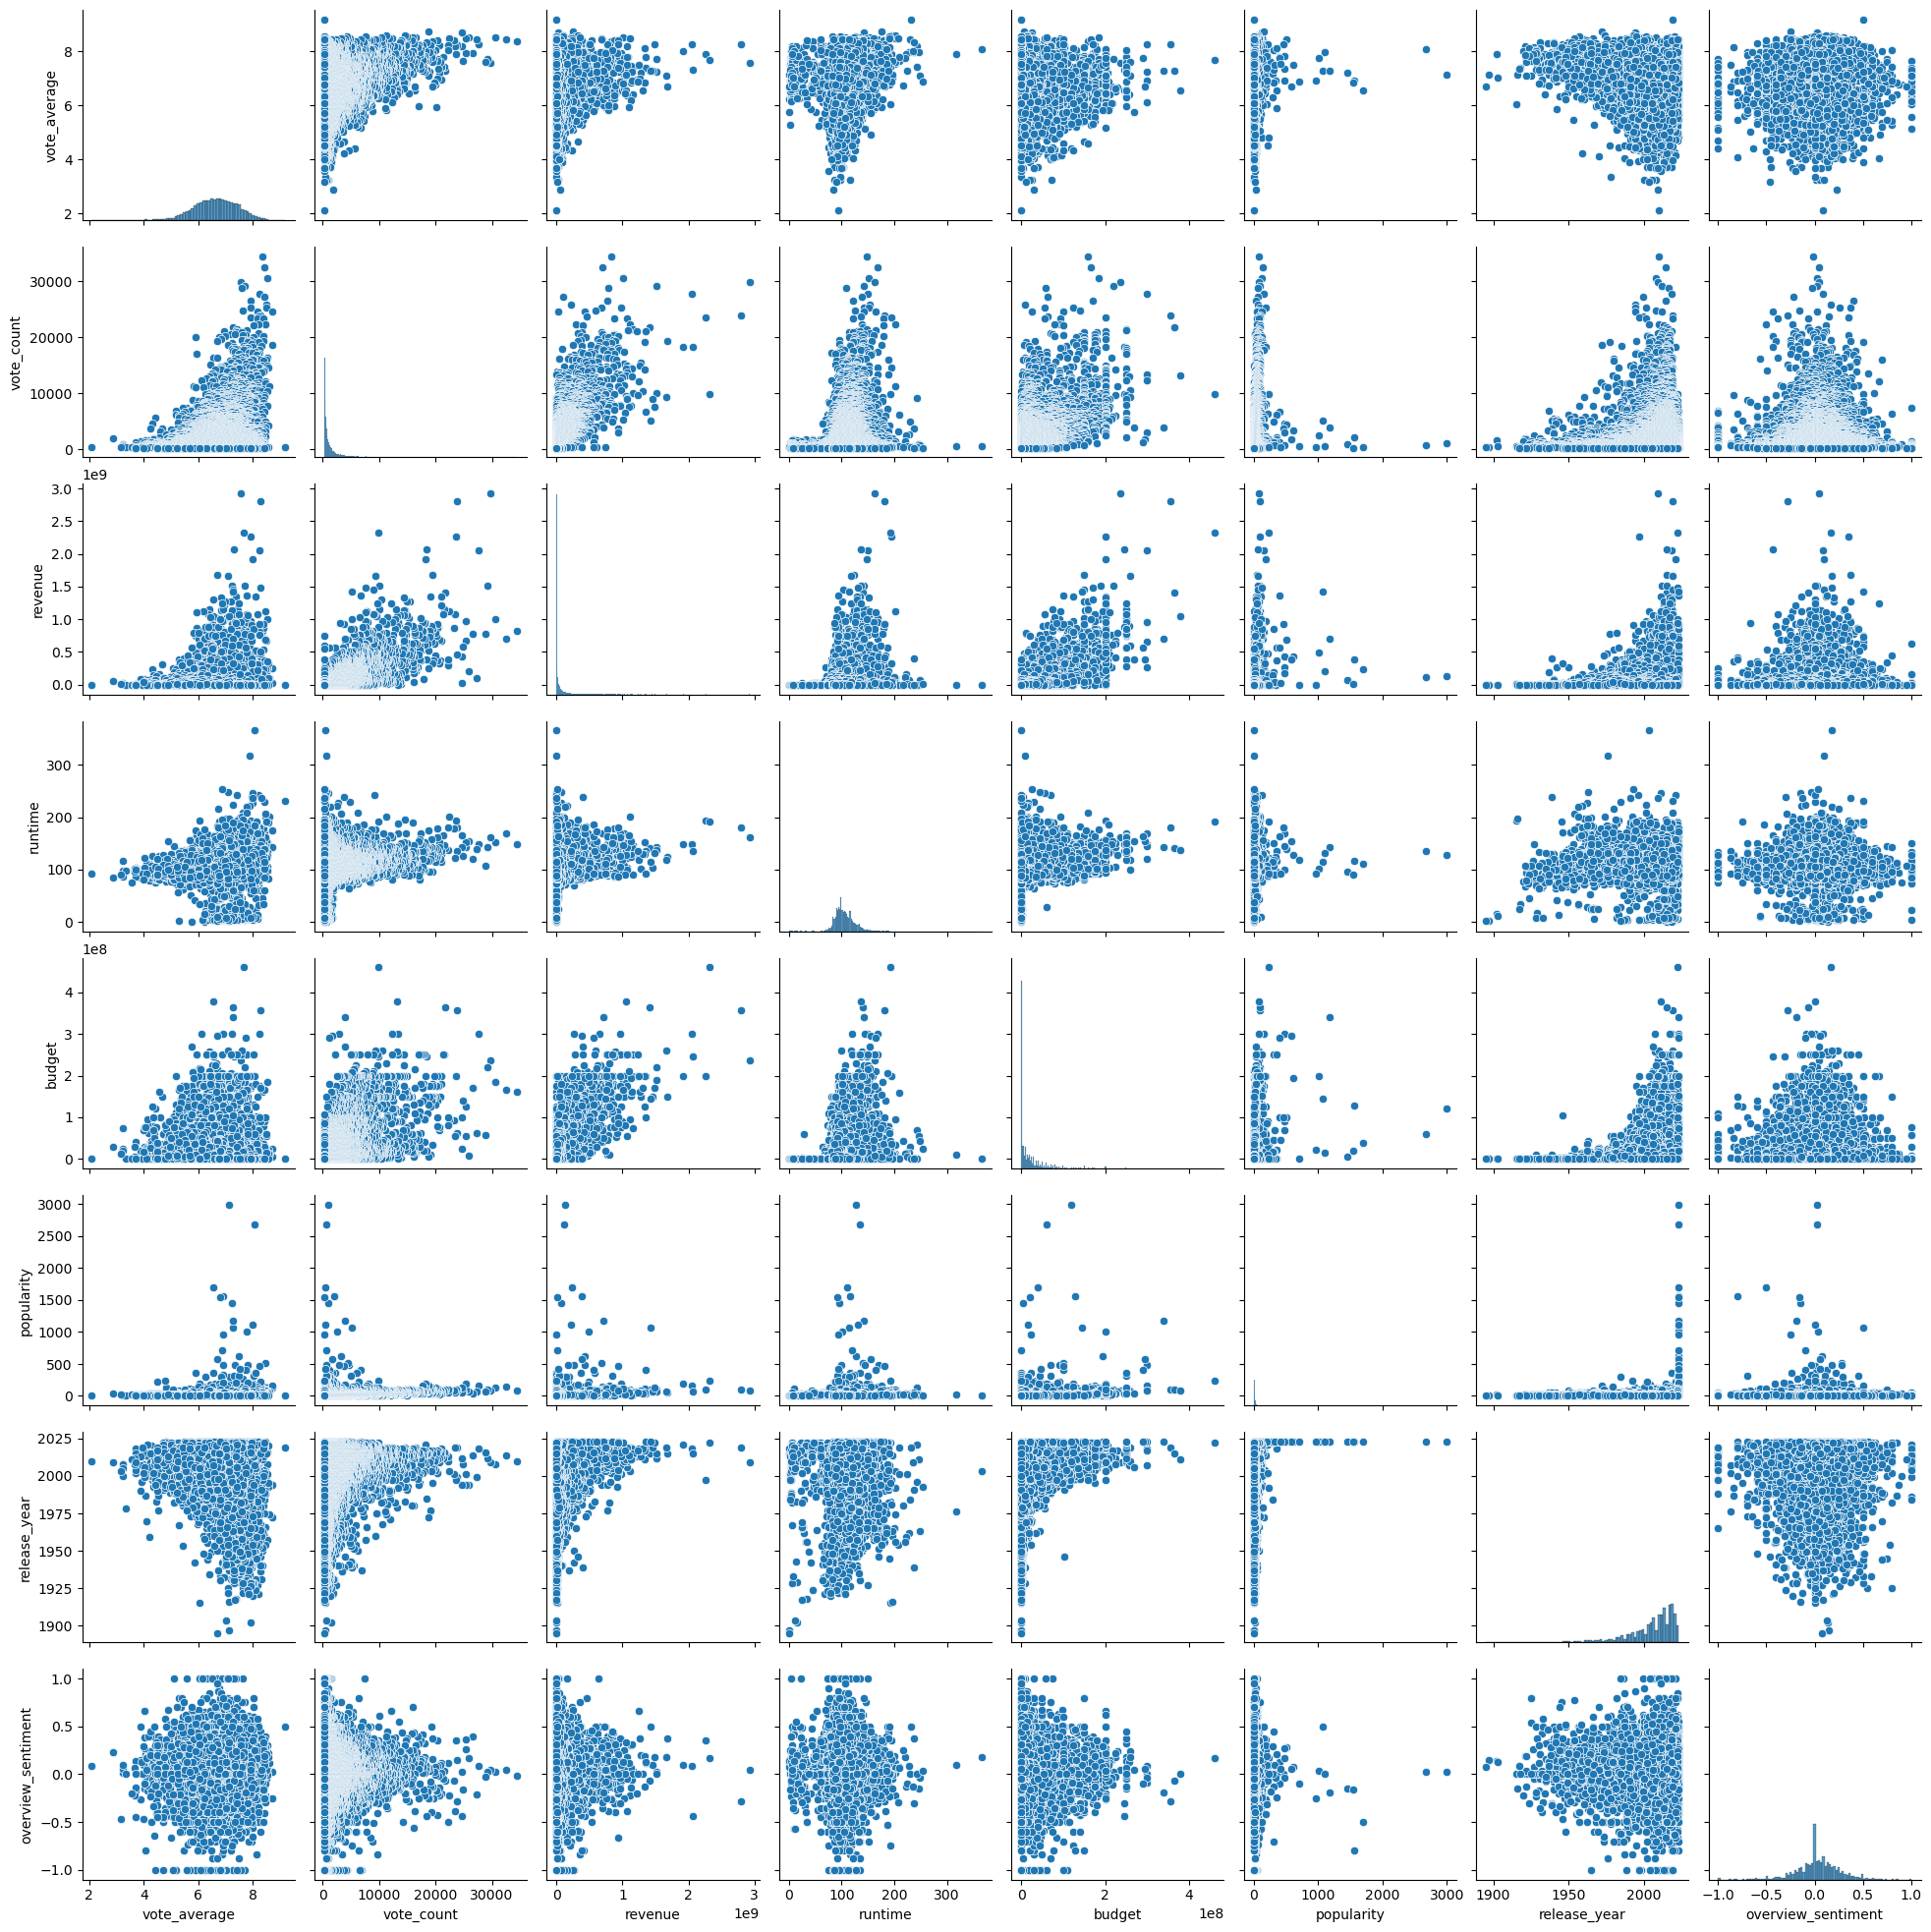

In [39]:
sns.pairplot(num_pop_df)

<Axes: xlabel='revenue', ylabel='Count'>

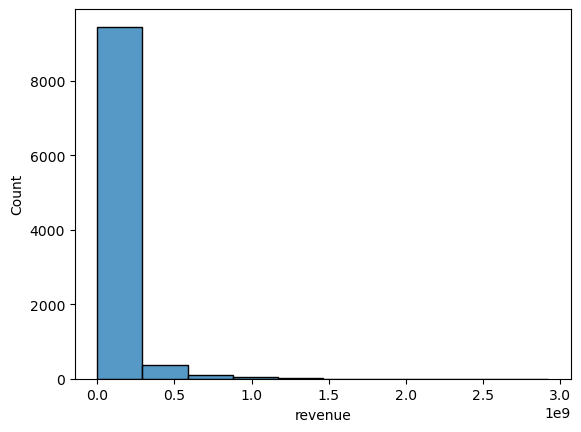

In [51]:
sns.histplot(data=num_pop_df['revenue'],bins=10)

In [56]:
movie_df[movie_df['budget']!= 0]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,release_year,Director,Writer,Director_of_Photography,Producers,Music_Composer,genres_list,Cast_list,overview_sentiment,all_combined_keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,2010.0,Christopher Nolan,Christopher Nolan,Wally Pfister,"Thomas Tull, Christopher Nolan, Chris Brigham,...",Hans Zimmer,"['Action', 'Science Fiction', 'Adventure']","['Tim Kelleher', 'Silvie Laguna', 'Natasha Bea...",-0.011111,"['s', 'philosophy', 'skilled', 'kidnapping', '..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,2014.0,Christopher Nolan,Jonathan Nolan,Hoyte van Hoytema,"Jake Myers, Emma Thomas, Jordan Goldberg, Thom...",Hans Zimmer,"['Adventure', 'Drama', 'Science Fiction']","['Jeff Hephner', 'William Devane', 'Elyes Gabe...",0.045455,"['thoughtful', 'use', 'scientist', 'quantum me..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,2008.0,Christopher Nolan,Jonathan Nolan,Wally Pfister,"Kevin De La Noy, Thomas Tull, Christopher Nola...","Hans Zimmer, James Newton Howard","['Drama', 'Action', 'Crime', 'Thriller']","['Tommy Lister Jr.', 'Edison Chen', 'Beatrice ...",0.025000,"['reign', 'harvey', 'proves', 'partnership', '..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,2009.0,James Cameron,James Cameron,Mauro Fiore,"Jon Landau, Colin Wilson, Laeta Kalogridis, Ja...",James Horner,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Carvon Futrell', 'Joel David Moore', 'Jon Cu...",0.041667,"['space war', 'civilization', 'society', 'mari..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,2012.0,Joss Whedon,Sydney Newman,NaN,NaN,NaN,"['Science Fiction', 'Action', 'Adventure']","['Haneyuri', 'Nako Mizusawa', 'Marin', 'Rikako...",0.025000,"['s', 'world', 'begins', 'e', 'global safety',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348629,1253317,Food Poisoning,8.000,1,Released,2023-01-01,0,16,False,30,...,2023.0,Ryan Connolly,NaN,NaN,NaN,NaN,['Comedy'],"['Josh Connolly', 'Justin Robinson', 'Todd Bru...",-0.050000,"['impending', 'ravenous', 'prowess', 'dark', '..."
348652,436925,Gossip,3.000,1,Released,1953-01-01,0,10,False,1000,...,1953.0,"Shahmar Alakbarov, Gyulbeniz Yusuf Azimzade","Anar Rzayev, Dinara Garakmazli",Rashid Naghiyev,NaN,NaN,['Drama'],"['Tavakkul Ismailov', 'Sona Mikailova', 'Shami...",0.133750,"['life', 'malicious', 'spread', 'high', 'gossi..."
348685,897832,Doctor Faustus,5.000,1,Released,2021-08-23,0,58,False,1500,...,2021.0,Unknown,NaN,NaN,NaN,NaN,['Drama'],['Tim Vine'],-0.100000,"['faustus', 'christopher', 'tragical history',..."
348696,69435,Aanai,7.000,1,Released,2005-05-05,500000,157,False,500000,...,2005.0,Aćim Vasić,Aćim Vasić,Arnaud Carney,"Aćim Vasić, Luc Walpoth",NaN,"['Action', 'Drama', 'Thriller']","['Guillaume Tavi', 'Nicky Naudé']",-0.076923,"['stars actors', 'arjun', 'soundtrack', 'manoj..."
